# Import Libraries

In [294]:
# General
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from scipy import sparse
from collections import Counter
import itertools
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import ast
from collections import Counter
import seaborn as sns

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Functions

In [295]:
def pretty_print_conf_matrix(y_true, y_pred, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)

def str_int(List):
  indx = []
  value = []
  for i,j in enumerate(List):
    try:
      a = int(j)
    except Exception:
      indx.append(i)
      value.append(j)
      pass
  return dict(zip(indx, value)), indx        

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Load file

In [296]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [297]:
path = "/content/drive/My Drive/Data/movies_metadata.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
path = "/content/drive/My Drive/Data/credits.csv"
credit = pd.read_csv(path)
credit.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


# EDA 

### Budget

In [298]:
issues, indx = str_int(df['budget'])
issues

{19730: '/ff9qCepilowshEtG2GYWwzt2bs4.jpg',
 29503: '/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg',
 35587: '/zaSf5OG7V8X8gqFvly88zDdRm46.jpg'}

In [ ]:
for i in indx:
  df['budget'][i] = 0
df['budget'] = [int(x) for x in df['budget']]

total non_zero count:  8890


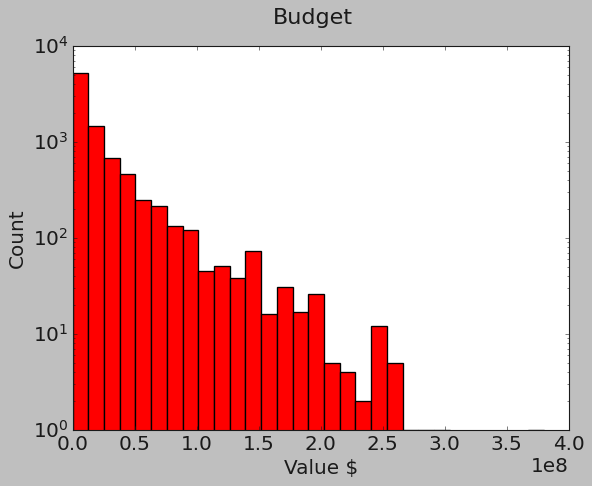

In [302]:
budg = list(df['budget'])
budg = [x for x in budg if x != 0]
plt.hist(budg, bins= 30, color = 'red', edgecolor='black', linewidth=1.2 )
plt.xlabel('Value $')
plt.ylabel('Count')
plt.suptitle('Budget', fontsize=20)
plt.rcParams.update({'font.size': 18})
pyplot.yscale('log')
print('total non_zero count: ', len(budg))

### Revenue

In [303]:
issues, indx = str_int(df['revenue'])
issues

{19729: nan, 19730: nan, 29502: nan, 29503: nan, 35586: nan, 35587: nan}

In [ ]:
for i in indx:
  df['revenue'][i] = 0
df['revenue'] = [int(x) for x in df['revenue']]

total non_zero count:  7408


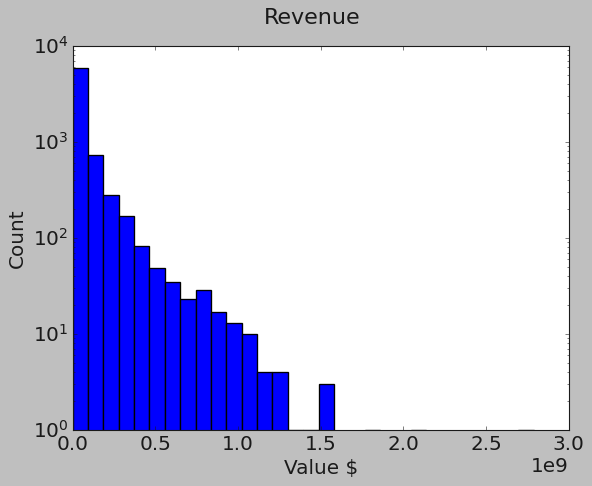

In [305]:
rev = list(df['revenue'])
rev = [x for x in rev if x != 0]
plt.hist(rev, bins= 30, edgecolor='black', linewidth=1.2, color = 'blue')
plt.xlabel('Value $')
plt.ylabel('Count')
plt.suptitle('Revenue', fontsize=20)
plt.rcParams.update({'font.size': 18})
pyplot.yscale('log')
print('total non_zero count: ', len(rev))

### Profit & Loss

total count of profit:  8890


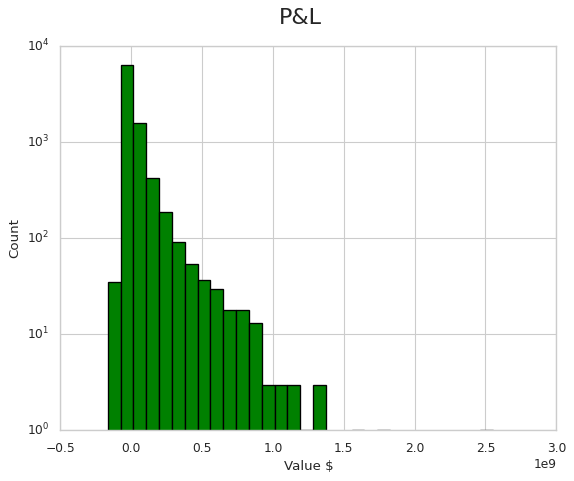

In [332]:
rev = list(df['revenue'])
budg = list(df['budget'])
prof = [x-y for x,y in zip(rev, budg) if y != 0 ]
print('total count of profit: ', len(prof))
plt.hist(prof, bins= 30,facecolor='green',  edgecolor='black', linewidth=1.2)
plt.xlabel('Value $')
plt.ylabel('Count')
plt.suptitle('P&L', fontsize=20)
plt.rcParams.update({'font.size': 18})
pyplot.yscale('log')

### Profit Ratio

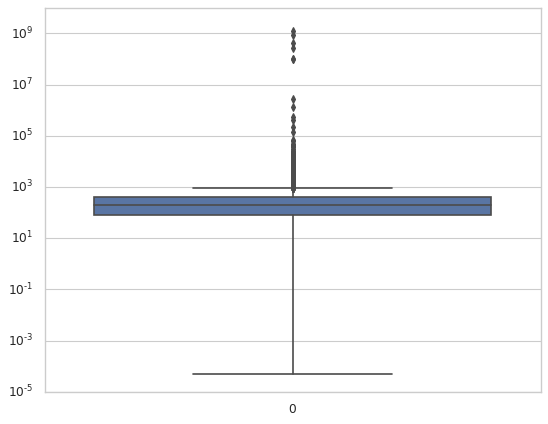

In [343]:
df['profit']= (df['revenue']*100/df['budget'])
df['profit']=df['profit'].replace(np.nan, 'Nan')
df['profit']=df['profit'].replace(np.inf, 'Nan')
df['profit']=df['profit'].replace(0, 'Nan')
profits = [x for x in df['profit'] if type(x) == float]

sns.set(style="whitegrid")
ax = sns.boxplot(data=profits)
ax.set_yscale("log")

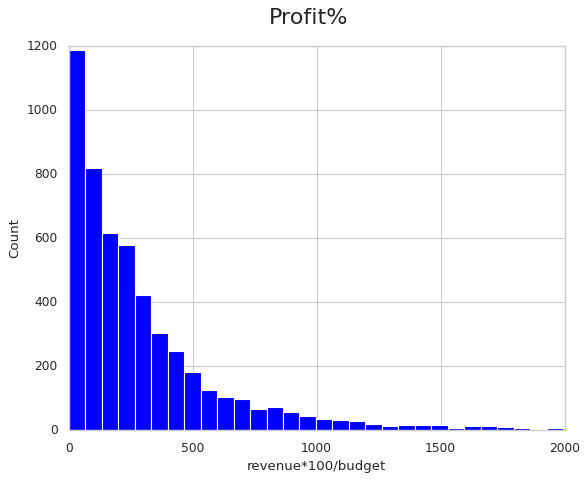

In [344]:
profits = [x for x in profits if  x <= 2000]
plt.hist(profits,bins = 30, color = 'blue');
plt.xlabel('revenue*100/budget')
plt.ylabel('Count')
plt.suptitle('Profit%', fontsize=20)
plt.rcParams.update({'font.size': 18})

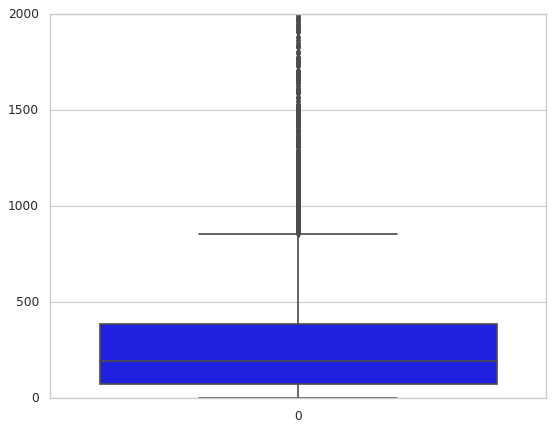

In [340]:
ax = sns.boxplot(data=profits, color = 'blue')
#ax.set_yscale("log")

## Release Date

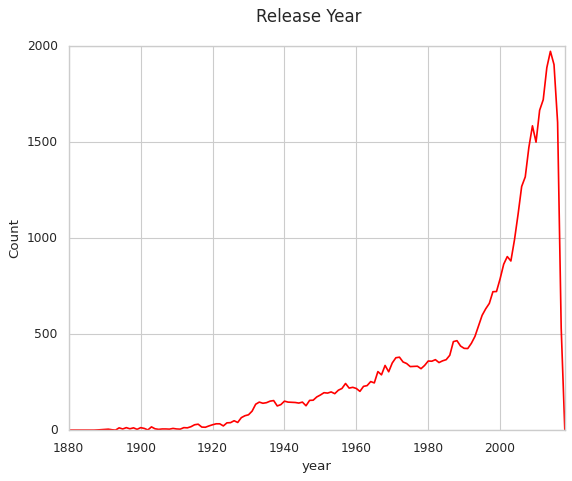

In [360]:
df['release_date'] =df['release_date'].replace(np.nan, '1873')
date = [int(x[:4]) for x in df['release_date']]
a = (np.unique(date, return_counts=True))
dates = dict(zip(a[0], a[1]))
plt.plot(list(dates.keys()), list(dates.values()), color = 'red');
plt.xlabel('year')
plt.ylabel('Count')
plt.suptitle('Release Year', fontsize=15)
plt.rcParams.update({'font.size': 20})
plt.axis([1880, 2018, 0, 2000]);

## run time

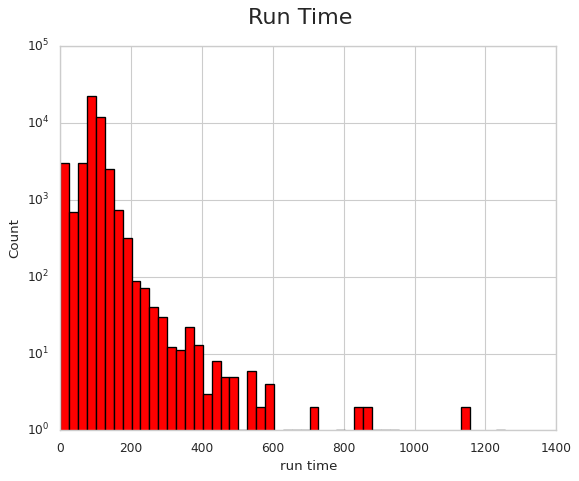

In [362]:
df['runtime'] = df['runtime'].replace(np.nan, 0)
df['runtime'] = [int(x) for x in df['runtime']]

plt.hist(df['runtime'], 50,edgecolor='black', linewidth=1.2, color= 'red' );
pyplot.yscale('log')
plt.xlabel('run time')
plt.ylabel('Count')
plt.suptitle('Run Time', fontsize=20)
plt.rcParams.update({'font.size': 28})

## Popularity

In [ ]:
indx = []
for i in range(len(df['popularity'])):
  try:
    a = float(df['popularity'][i])
  except Exception:
    indx.append(i)
    pass
indx

[35587]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


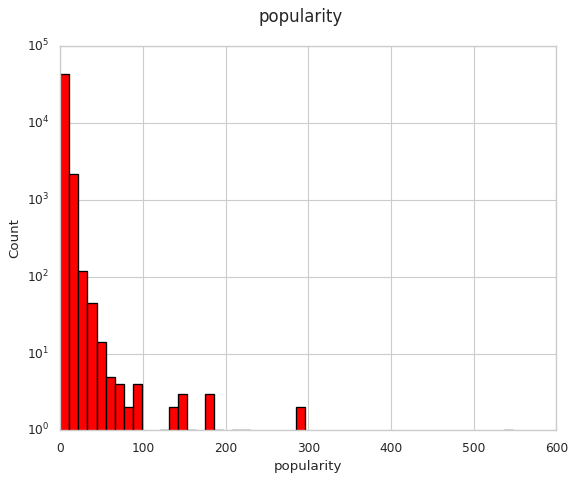

In [363]:
df['popularity'][35587] = 0
df['popularity'] = df['popularity'].replace(np.nan, 0)
df['popularity'] =  [float(x) for x in df['popularity']]
plt.hist(df['popularity'], 50,edgecolor='black', linewidth=1.2, color= 'red' );
pyplot.yscale('log')
plt.xlabel('popularity')
plt.ylabel('Count')
plt.suptitle('popularity', fontsize=15)
plt.rcParams.update({'font.size': 20})

## Language

93
{'104.0': 1, '68.0': 1, '82.0': 1, 'Nan': 11, 'ab': 10, 'af': 2, 'am': 2, 'ar': 39, 'ay': 1, 'bg': 10, 'bm': 3, 'bn': 29, 'bo': 2, 'bs': 14, 'ca': 12, 'cn': 313, 'cs': 130, 'cy': 1, 'da': 225, 'de': 1080, 'el': 113, 'en': 32269, 'eo': 1, 'es': 994, 'et': 24, 'eu': 3, 'fa': 101, 'fi': 297, 'fr': 2438, 'fy': 1, 'gl': 1, 'he': 67, 'hi': 508, 'hr': 29, 'hu': 100, 'hy': 1, 'id': 20, 'is': 24, 'it': 1529, 'iu': 2, 'ja': 1350, 'jv': 1, 'ka': 18, 'kk': 3, 'kn': 3, 'ko': 444, 'ku': 3, 'ky': 3, 'la': 1, 'lb': 1, 'lo': 2, 'lt': 9, 'lv': 18, 'mk': 5, 'ml': 36, 'mn': 2, 'mr': 25, 'ms': 5, 'mt': 1, 'nb': 6, 'ne': 2, 'nl': 248, 'no': 106, 'pa': 2, 'pl': 219, 'ps': 2, 'pt': 316, 'qu': 1, 'ro': 57, 'ru': 826, 'rw': 1, 'sh': 5, 'si': 1, 'sk': 9, 'sl': 17, 'sm': 1, 'sq': 5, 'sr': 63, 'sv': 384, 'ta': 78, 'te': 45, 'tg': 1, 'th': 76, 'tl': 23, 'tr': 150, 'uk': 16, 'ur': 8, 'uz': 1, 'vi': 10, 'wo': 5, 'xx': 33, 'zh': 409, 'zu': 1}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


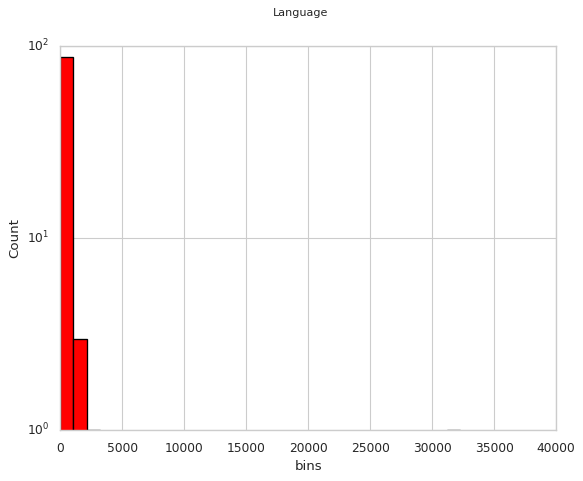

In [369]:
df['original_language'] = df['original_language'].replace(np.nan, 'Nan')
a = (np.unique(df['original_language'], return_counts=True))
print(len(a[1]))
print(dict(zip(a[0], a[1])))
plt.hist(a[1], 30,edgecolor='black', linewidth=1.2, color= 'red' );
pyplot.yscale('log')
plt.xlabel('bins')
plt.ylabel('Count')
plt.suptitle('Language', fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.axis([0,40000, 0, 100])
pyplot.yscale('log')

#### OHE of languages

In [ ]:
lang = np.array(df['original_language'])
LE = LabelEncoder()
LE.fit_transform(lang)
lang = lang.reshape(len(lang), 1)
OH = OneHotEncoder(sparse = False)
lang = pd.DataFrame(OH.fit_transform(lang))
len(lang)

45466

## Correlations

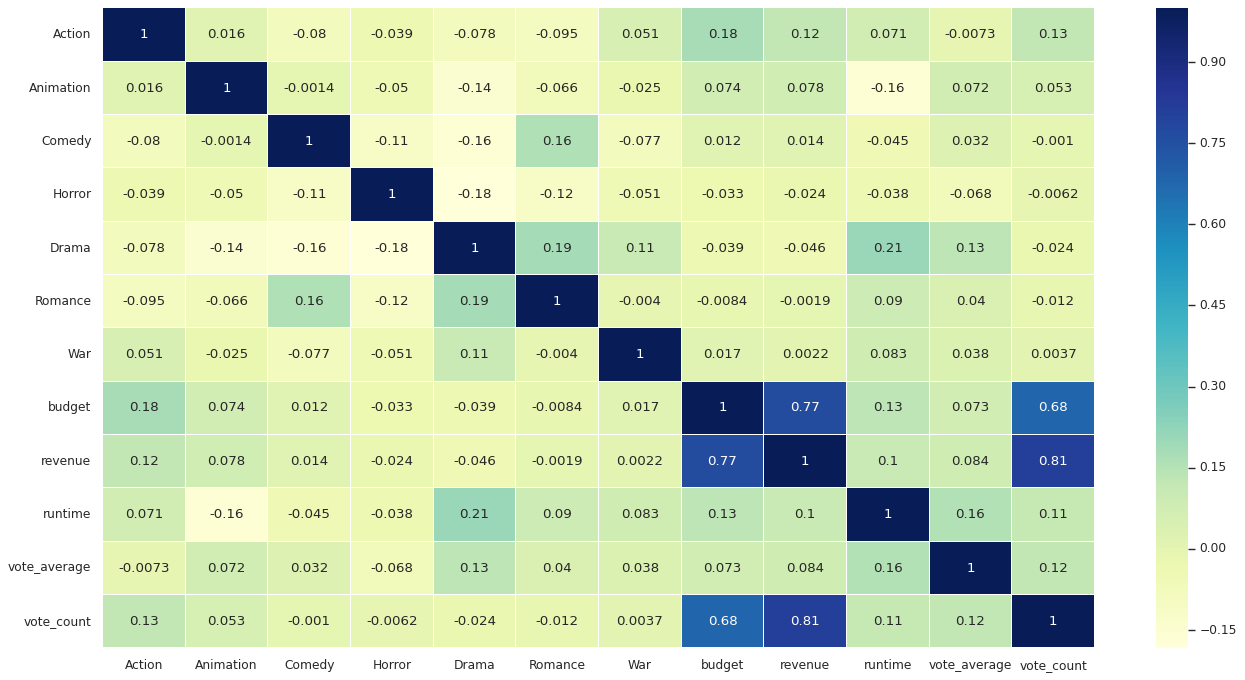

In [327]:
selected_genres = genres_df[['Action', 'Animation', 'Comedy', 'Horror', 'Drama', 'Romance', 'War']]
corr_df = selected_genres.join(df)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_df.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2, ax = ax);

#### Filter for Budget

2484


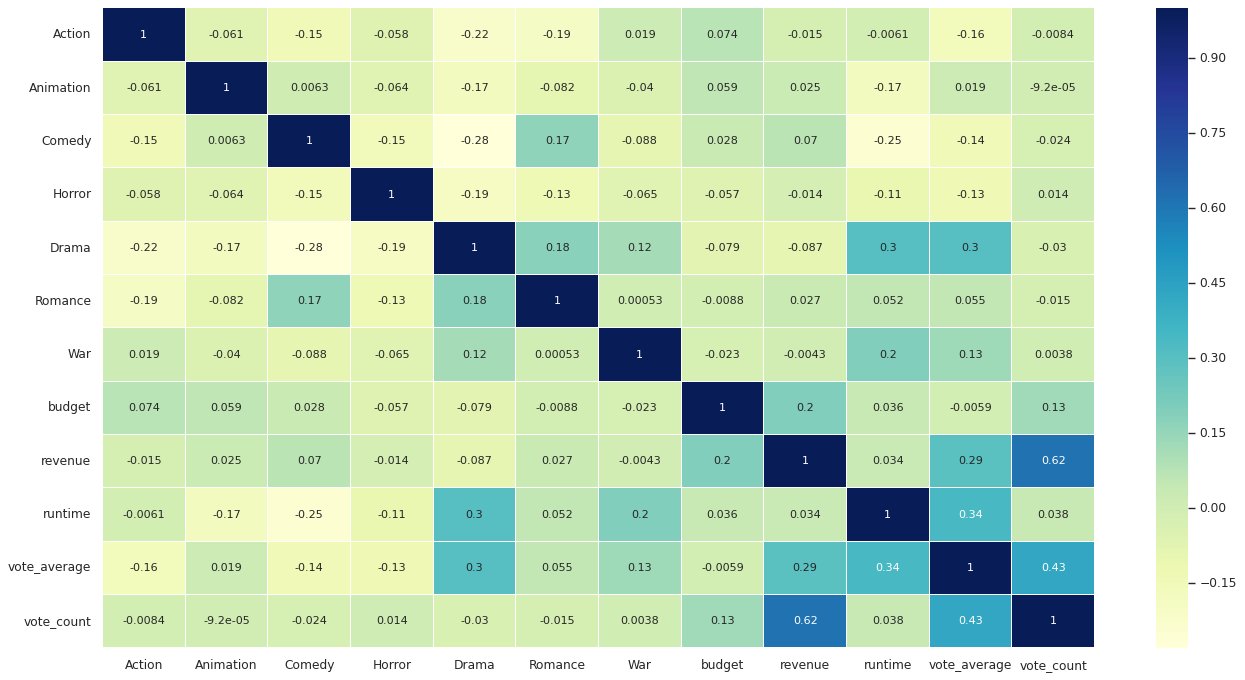

In [370]:
df_25 = corr_df[(corr_df['budget']>10000000)&(corr_df['budget']<40000000)]
print(len(df_25))
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_25.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2, ax = ax);

# Unique Genres

In [377]:
genres = []
for i in df['genres']:
  temp = ast.literal_eval(i)
  for j in temp:
    genres.append(j['name'])
uniqG = list(np.unique(genres))

In [ ]:
print(len(uniqG))
uniqG[0:5]

32


['Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV']

## OHE of Genres

In [378]:
genres_df = pd.DataFrame(0, index=np.arange(len(df)), columns=uniqG)
for i in range(len(df['genres'])):
  temp = ast.literal_eval(df['genres'][i])
  for j in temp:
    col = j['name']
    if col in uniqG:
      genres_df[col][i] = 1
genres_df.head(2)

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Unique Production

In [379]:
prod = []
issue = []
df['production_companies'] = df['production_companies'].replace(np.NaN, "[{'name': 'nan'}]") 
df['production_companies'] = df['production_companies'].replace('False', "[{'name': 'nan'}]") 

for i in range(len(df['production_companies'])):
      temp = ast.literal_eval(df['production_companies'][i])
      for j in temp:
          prod.append(j['name'])
uniqP = list(np.unique(prod))
print(len(uniqP))
uniqP[50:55]

23538


['185º Equator',
 '19 Entertainment',
 '1976 Productions',
 '1984 Private Defense Contractors',
 '1992 Number Four Limited Partnership']

259

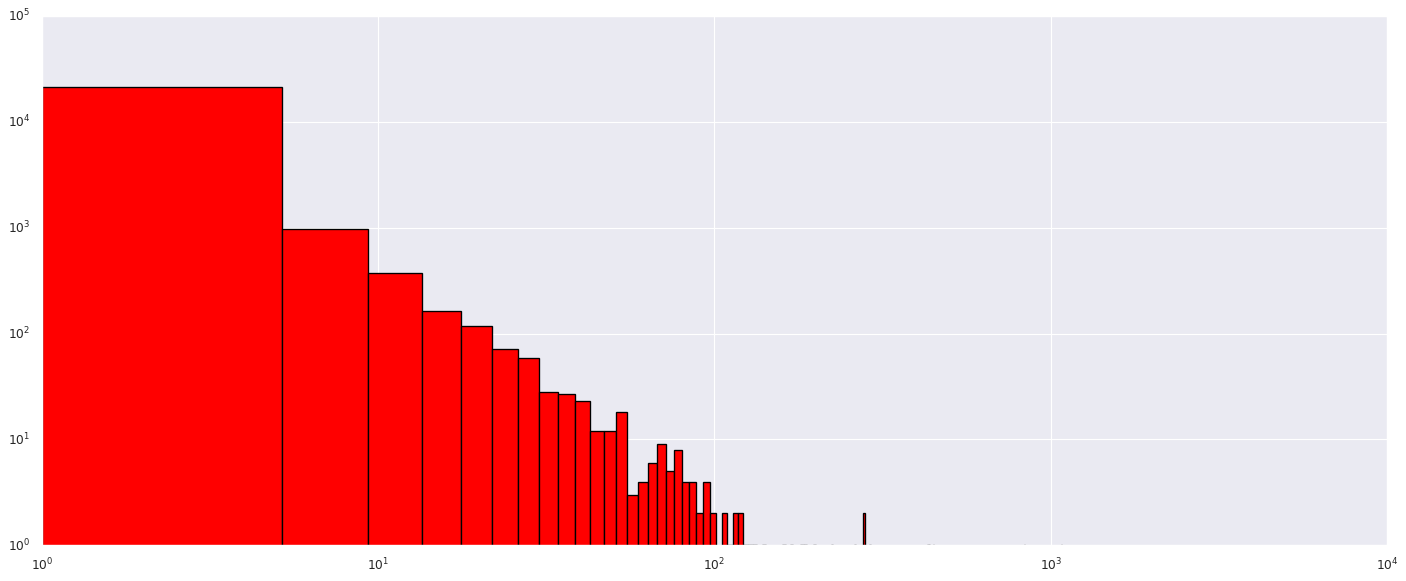

In [381]:
values = Counter(prod).values()
plt.hist(values, 300, color = 'red', edgecolor='black', linewidth=1.2)
pyplot.yscale('log')
pyplot.xscale('log')
value = sorted(list(values), reverse = True)
value = [x for x in value if x > 25]
len(value)

## OHE of production

In [382]:
bigger_than = ([x for x,y in dict(Counter(prod)).items() if y > 10])
prod_df = pd.DataFrame(0, index=np.arange(len(df)), columns = bigger_than)
for i in range(len(df['production_companies'])):
  temp = ast.literal_eval(df['production_companies'][i])
  for j in temp:
    col = j['name']
    if col in bigger_than:
      prod_df[col][i] = 1
prod_df.head(2)

,Pixar Animation Studios,TriStar Pictures,Interscope Communications,Warner Bros.,Twentieth Century Fox Film Corporation,Sandollar Productions,Touchstone Pictures,Regency Enterprises,Paramount Pictures,Scott Rudin Productions,Mirage Enterprises,Walt Disney Pictures,Universal Pictures,United Artists,Eon Productions,Columbia Pictures,Castle Rock Entertainment,Amblin Entertainment,Hollywood Pictures,Cinergi Pictures Entertainment,Le Studio Canal+,Metro-Goldwyn-Mayer (MGM),Carolco Pictures,Columbia Pictures Corporation,Miramax Films,Morgan Creek Productions,Jersey Films,New Regency Pictures,Silver Pictures,Canal+,Dino De Laurentiis Company,Caravan Pictures,New Line Cinema,BBC Films,Procirep,France 3 Cinéma,Eurimages,MEDIA Programme of the European Union,Televisión Española (TVE),Tele München Fernseh Produktionsgesellschaft (TMG),...,Filmgate Films,Gorky Film Studios,XYZ Films,Worldview Entertainment,Entertainment One,Lotte Entertainment,Versus Production,VOO,Annapurna Pictures,Universal 1440 Entertainment,Johnson Production Group,Demarest Films,Caliber Media Company,A24,TSG Entertainment,Soyuzmultfilm,Anton Capital Entertainment (ACE),New Wave Entertainment Television,Concorde-New Horizons,Gosteleradio,Bron Studios,Dharma Productions,RatPac-Dune Entertainment,LStar Capital,Netflix,Atresmedia Cine,Balcázar Producciones Cinematográficas,Flora Film,Celtic Films Entertainment,Reel One Entertainment,Star Film Company,Mattel,The Hallmark Channel,Hrvatska Radiotelevizija (HRT),Marvista Entertainment,Fox Star Studios,Enjoy Movies,GMM Tai Hub (GTH),Dean Hargrove Productions,Comedy Dynamics
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model RF (revenue)/Regression

In [ ]:
beRemoved = []
sums = list(prod_df.sum(axis = 1))
for i in range(len(sums)):
  if sums[i] == 0:
    beRemoved.append(i)

In [383]:
print(len(df), len(prod_df), len(genres_df))
model_df = df[['budget', 'revenue', 'runtime']]
model_df = prod_df.join(model_df)
del model_df['Aniplex']
model_df = genres_df.join(model_df)
model_df = lang.join(model_df)
#model_df = model_df.drop(model_df.index[beRemoved])
print(len(model_df))
model_df = model_df[model_df['revenue']!=0]
print(len(model_df))
model_df = model_df[model_df['budget'] != 0]
print(len(model_df))
model_df = model_df[model_df['revenue']<10**9]
print(len(model_df))
model_df.head(2)

45466 45466 45466
45466
7408
5381
5352


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,Worldview Entertainment,Entertainment One,Lotte Entertainment,Versus Production,VOO,Annapurna Pictures,Universal 1440 Entertainment,Johnson Production Group,Demarest Films,Caliber Media Company,A24,TSG Entertainment,Soyuzmultfilm,Anton Capital Entertainment (ACE),New Wave Entertainment Television,Concorde-New Horizons,Gosteleradio,Bron Studios,Dharma Productions,RatPac-Dune Entertainment,LStar Capital,Netflix,Atresmedia Cine,Balcázar Producciones Cinematográficas,Flora Film,Celtic Films Entertainment,Reel One Entertainment,Star Film Company,Mattel,The Hallmark Channel,Hrvatska Radiotelevizija (HRT),Marvista Entertainment,Fox Star Studios,Enjoy Movies,GMM Tai Hub (GTH),Dean Hargrove Productions,Comedy Dynamics,budget,revenue,runtime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30000000,373554033,81
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65000000,262797249,104


In [384]:
y = np.asarray(model_df['revenue'])
x = model_df.drop(['revenue'], axis = 1)
x = np.asarray(x)
x_train_, x_test_final, y_train_, y_test_final = train_test_split(x, y, test_size=0.1, random_state=134)
x_train, x_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.1, random_state=134)

n_estimators, max_depths, min_samples_split, min_samples_leaf = [10], [40], [4], [ 2]
for estimators in n_estimators:   
    for max_depth in max_depths:
        for min_sample_split in min_samples_split:
            for min_sample_leaf in min_samples_leaf:
              model = RandomForestRegressor(n_estimators = estimators, max_depth = max_depth,
                   min_samples_split = min_sample_split, min_samples_leaf = min_sample_leaf)
              model.fit(x_train, y_train)
              prediction_train = model.predict(x_train)
              prediction_test = model.predict(x_test)
              print('r2 CV: ',round( r2_score(y_test, prediction_test),2), '\n r2 train: ',
                    round(r2_score(y_train, prediction_train),2))

r2 CV:  0.6 
 r2 train:  0.85


### train vs. prediction

0.8455230424481994

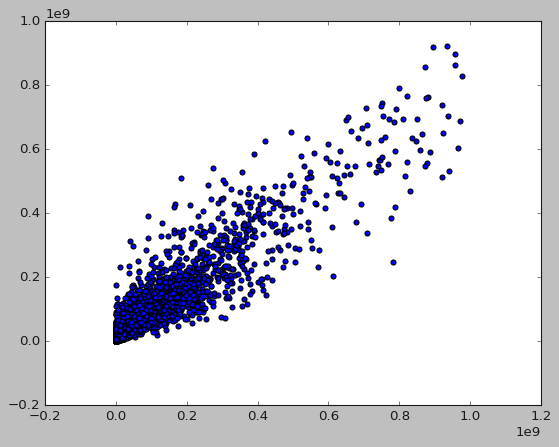

In [ ]:
plt.scatter(y_train, prediction_train, color = 'blue', edgecolors='black')
r2_score(y_train, prediction_train)

### test vs. prediction

0.668459085695049

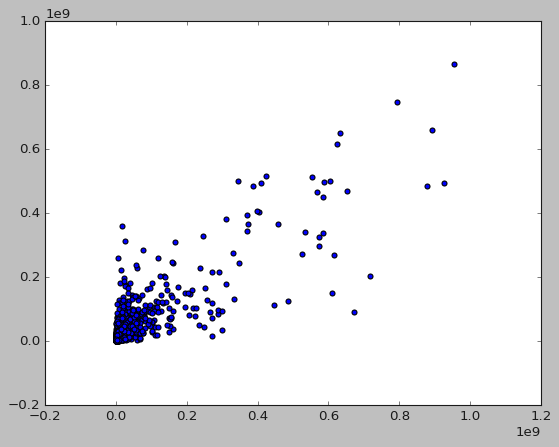

In [ ]:
plt.scatter(y_test, prediction_test, color = 'blue', edgecolors='black')
r2_score(y_test, prediction_test)

# Model RF (revenue)/classification

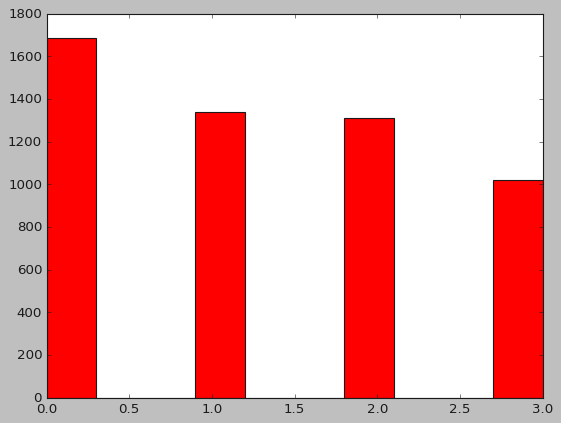

In [ ]:
target = []
for i in list(model_df['revenue']):
  if i < 1.1*10**7:
    target.append(0)
  elif i < 4*10**7:
    target.append(1)
  elif i < 13*10**7:
    target.append(2)
  else:
    target.append(3)
plt.hist(target, color= 'red');

In [ ]:
y = np.asarray(target)
x = model_df.drop(['revenue'], axis = 1)
x = np.asarray(x)
x_train_, x_test_final, y_train_, y_test_final = train_test_split(x, y, test_size=0.1, random_state=134)
x_train, x_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.1, random_state=134)
n_estimators, max_depths, min_samples_split, min_samples_leaf = [ 200], [50], [8], [1]
for estimators in n_estimators:   
    for max_depth in max_depths:
        for min_sample_split in min_samples_split:
            for min_sample_leaf in min_samples_leaf:
              model = RandomForestClassifier(n_estimators = estimators, max_depth = max_depth,
                   min_samples_split = min_sample_split, min_samples_leaf = min_sample_leaf,random_state =44)
              model.fit(x_train, y_train)
              prediction_train = model.predict(x_train)
              prediction_test = model.predict(x_test)
              print(round(accuracy_score(prediction_test, y_test),2), 
                    round(accuracy_score(y_train, prediction_train),2), estimators, 
                    max_depth, min_sample_split, min_sample_leaf)

0.56 0.89 200 50 8 1


### train vs. prediction

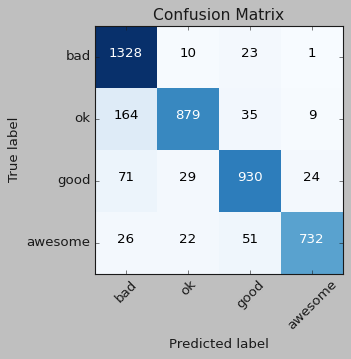

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(4,4))
plt.subplots_adjust(hspace = 0.1)
pretty_print_conf_matrix(y_train, prediction_train, classes= ['bad', 'ok', 'good', 'awesome'],
                         normalize=False, title='Confusion Matrix')

### test vs. prediction

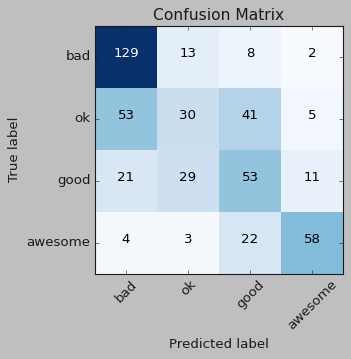

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(4,4))
plt.subplots_adjust(hspace = 0.1)
pretty_print_conf_matrix(y_test, prediction_test, classes= ['bad', 'ok', 'good', 'awesome'],
                         normalize=False, title='Confusion Matrix')

# Model RF (profit)/Regression

In [ ]:
model_df = df[['budget', 'profit', 'runtime']]
model_df = prod_df.join(model_df)
del model_df['Aniplex']
model_df = genres_df.join(model_df)
#model_df = model_df.drop(model_df.index[beRemoved])
print(len(model_df))
model_df = model_df[model_df['profit']!='Nan']
print(len(model_df))
model_df = model_df[model_df['profit']<1000]
print(len(model_df))
model_df.head(2)

45466
5381
4927


,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble Production Committee,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western,Pixar Animation Studios,TriStar Pictures,Interscope Communications,Warner Bros.,Twentieth Century Fox Film Corporation,Sandollar Productions,Touchstone Pictures,Regency Enterprises,...,Worldview Entertainment,Entertainment One,Lotte Entertainment,Versus Production,VOO,Annapurna Pictures,Universal 1440 Entertainment,Johnson Production Group,Demarest Films,Caliber Media Company,A24,TSG Entertainment,Soyuzmultfilm,Anton Capital Entertainment (ACE),New Wave Entertainment Television,Concorde-New Horizons,Gosteleradio,Bron Studios,Dharma Productions,RatPac-Dune Entertainment,LStar Capital,Netflix,Atresmedia Cine,Balcázar Producciones Cinematográficas,Flora Film,Celtic Films Entertainment,Reel One Entertainment,Star Film Company,Mattel,The Hallmark Channel,Hrvatska Radiotelevizija (HRT),Marvista Entertainment,Fox Star Studios,Enjoy Movies,GMM Tai Hub (GTH),Dean Hargrove Productions,Comedy Dynamics,budget,profit,runtime
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65000000,404.303,104
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16000000,509.076,127


In [ ]:
y = np.asarray(model_df['profit'])
x = model_df.drop(['profit'], axis = 1)
x = np.asarray(x)
x_train_, x_test_final, y_train_, y_test_final = train_test_split(x, y, test_size=0.1, random_state=134)
x_train, x_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.1, random_state=134)

n_estimators, max_depths, min_samples_split, min_samples_leaf = [10], [40], [4], [ 2]
for estimators in n_estimators:   
    for max_depth in max_depths:
        for min_sample_split in min_samples_split:
            for min_sample_leaf in min_samples_leaf:
              model = RandomForestRegressor(n_estimators = estimators, max_depth = max_depth,
                   min_samples_split = min_sample_split, min_samples_leaf = min_sample_leaf)
              model.fit(x_train, y_train)
              prediction_train = model.predict(x_train)
              prediction_test = model.predict(x_test)
              print('r2 CV: ',round( r2_score(y_test, prediction_test),2), '\n r2 train: ',
                    round(r2_score(y_train, prediction_train),2))

r2 CV:  0.08 
 r2 train:  0.67


### train vs. prediction

0.6705933361743655

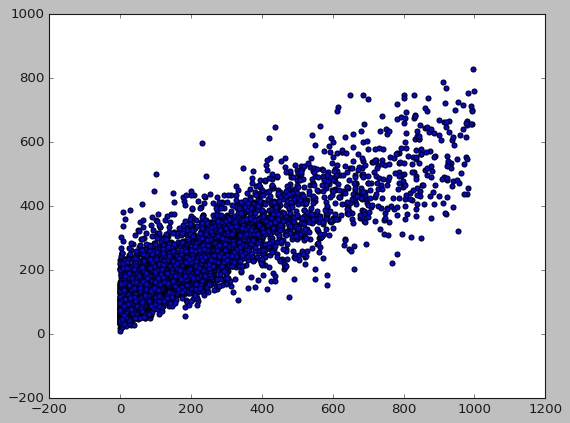

In [ ]:
plt.scatter(y_train, prediction_train, color = 'blue', edgecolors='black')
r2_score(y_train, prediction_train)

### test vs. prediction

0.08437983200415056

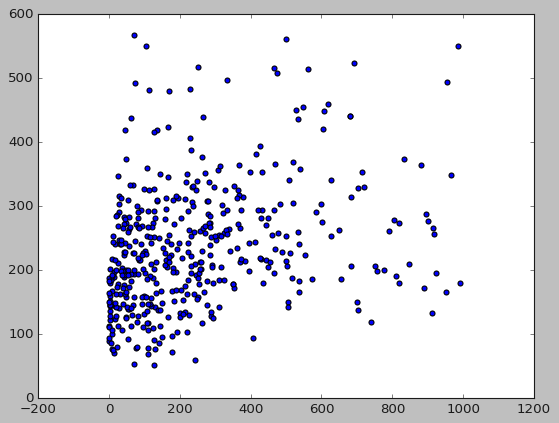

In [ ]:
plt.scatter(y_test, prediction_test, color = 'blue', edgecolors='black')
r2_score(y_test, prediction_test)

# Model RF(profit)/Classification

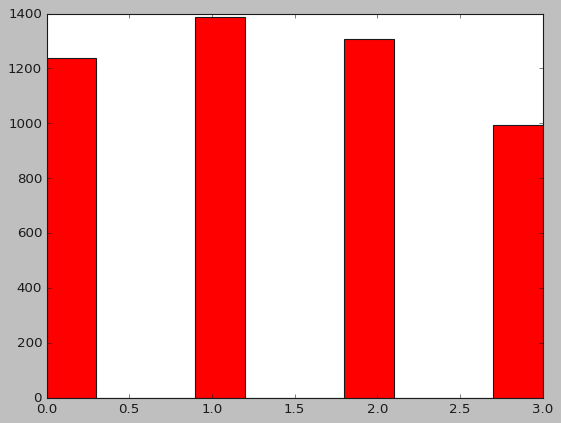

In [ ]:
target = []
for i in list(model_df['profit']):
  if i < 70:
    target.append(0)
  elif i < 200:
    target.append(1)
  elif i < 400:
    target.append(2)
  else:
    target.append(3)
plt.hist(target, color= 'red');

In [ ]:
y = np.asarray(target)
x = model_df.drop(['profit'], axis = 1)
x = np.asarray(x)
x_train_, x_test_final, y_train_, y_test_final = train_test_split(x, y, test_size=0.1, random_state=134)
x_train, x_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.1, random_state=134)
n_estimators, max_depths, min_samples_split, min_samples_leaf = [ 200], [50], [8], [1]
for estimators in n_estimators:   
    for max_depth in max_depths:
        for min_sample_split in min_samples_split:
            for min_sample_leaf in min_samples_leaf:
              model = RandomForestClassifier(n_estimators = estimators, max_depth = max_depth,
                   min_samples_split = min_sample_split, min_samples_leaf = min_sample_leaf,random_state =44)
              model.fit(x_train, y_train)
              prediction_train = model.predict(x_train)
              prediction_test = model.predict(x_test)
              print('accuracy CV', round(accuracy_score(prediction_test, y_test),2), '\n accuracy Train', 
                    round(accuracy_score(y_train, prediction_train),2))

accuracy CV 0.41 
 accuracy Train 0.87


### train vs. prediction

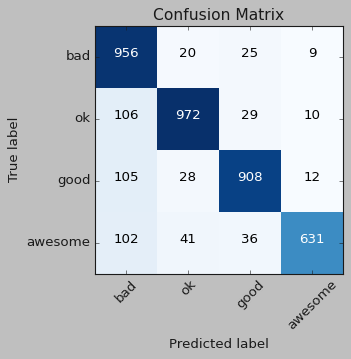

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(4,4))
plt.subplots_adjust(hspace = 0.1)
pretty_print_conf_matrix(y_train, prediction_train, classes= ['bad', 'ok', 'good', 'awesome'],
                         normalize=False, title='Confusion Matrix')

### test vs. prediction

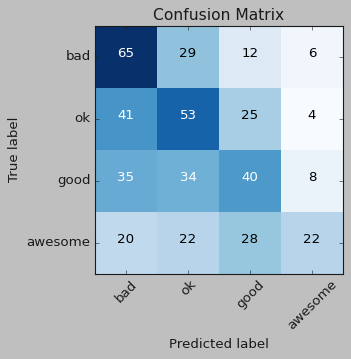

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(4,4))
plt.subplots_adjust(hspace = 0.1)
pretty_print_conf_matrix(y_test, prediction_test, classes= ['bad', 'ok', 'good', 'awesome'],
                         normalize=False, title='Confusion Matrix')

# Model SVM

In [ ]:
y = np.asarray(target)
x = model_df.drop(['profit'], axis = 1)
x = np.asarray(x)
x_train_, x_test_final, y_train_, y_test_final = train_test_split(x, y, test_size=0.1, random_state=134)
x_train, x_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.1, random_state=134)
model = SVC()
model.fit(x_train, y_train)
prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)
print(round(accuracy_score(prediction_test, y_test),2), 
                    round(accuracy_score(y_train, prediction_train),2))

0.34 0.32 200 50 8 1


# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data = principalComponents
             , columns = ['one', 'two'])

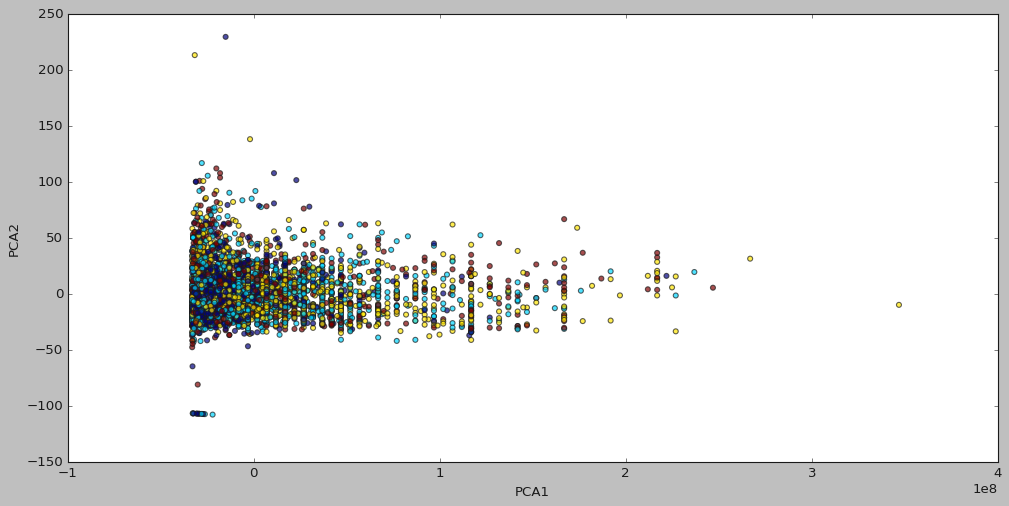

In [ ]:
a = pdf['one'].tolist()
b = pdf['two'].tolist()
plt.figure(figsize=(15,7))
plt.scatter(a,b, alpha=0.6899, c = target)
plt.xlabel('PCA1')
plt.ylabel('PCA2');

# TSNA

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4927 samples in 0.602s...
[t-SNE] Computed neighbors for 4927 samples in 2.842s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4927
[t-SNE] Computed conditional probabilities for sample 2000 / 4927
[t-SNE] Computed conditional probabilities for sample 3000 / 4927
[t-SNE] Computed conditional probabilities for sample 4000 / 4927
[t-SNE] Computed conditional probabilities for sample 4927 / 4927
[t-SNE] Mean sigma: 5.828746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.645847
[t-SNE] KL divergence after 1000 iterations: 0.215252


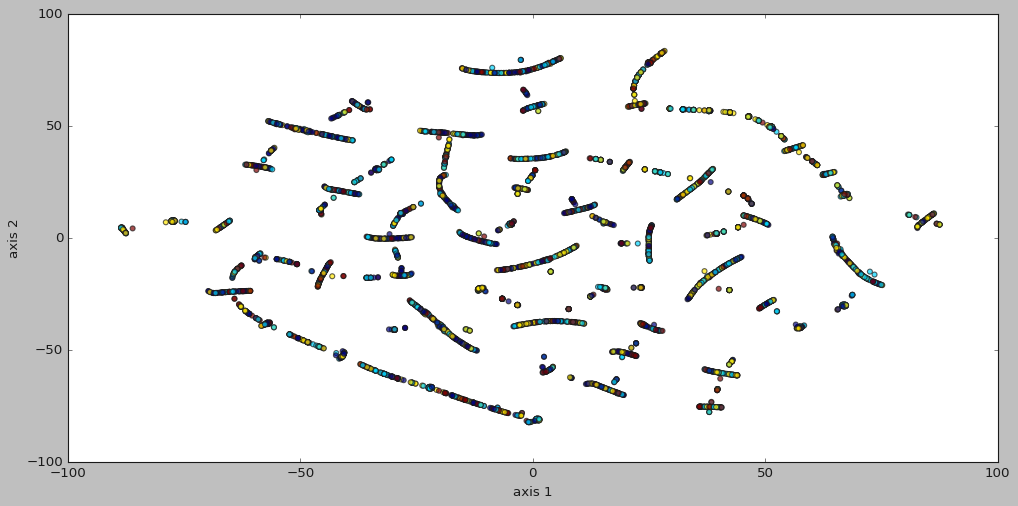

In [ ]:
pdf = pd.DataFrame(data = tsne_results
             , columns = ['one', 'two'])
a = pdf['one'].tolist()
b = pdf['two'].tolist()
plt.figure(figsize=(15,7))
plt.scatter(a,b, alpha=0.6899, c = target)
plt.xlabel('axis 1')
plt.ylabel('axis 2');

# Recommendation

In [ ]:
rec_df = genres_df[['Action', 'Animation', 'Comedy', 'Horror', 'Drama', 'Romance', 'War', 'Family', 'Science Fiction', 'Thriller']]
rec_df['profit'] = df['profit']
rec_df['budget'] = df['budget']
rec_df['original_language'] = df['original_language']
rec_df['release_date'] =date

In [372]:
print(len(rec_df), 'original')
rec_df = rec_df[rec_df['profit']!='Nan']
print('lenght reduced to {} after removing budget or revenue = 0'.format(len(rec_df)))
rec_df = rec_df[rec_df['profit']<10000]
print('lenght reduced to {} after removing profit outliers'.format(len(rec_df)))
rec_df = rec_df[rec_df['release_date'] > 2000]
print('lenght reduced to {} after removing movies made before 2001'.format(len(rec_df)))
rec_df = rec_df[(rec_df['budget']>10000000)&(rec_df['budget']<40000000)]
print('lenght reduced to {} after filtering the budget'.format(len(rec_df)))
# rec_df = rec_df[rec_df['original_language']== 'fr']
# print('lenght reduced to {} after filtering for FR'.format(len(rec_df)))
rec_df.reset_index(inplace=True, drop=True)
rec_df.head(3)

45466 original
lenght reduced to 5381 after removing budget or revenue = 0
lenght reduced to 5334 after removing profit outliers
lenght reduced to 3268 after removing movies made before 2001
lenght reduced to 1195 after filtering the budget


,Action,Animation,Comedy,Horror,Drama,Romance,War,Family,Science Fiction,Thriller,profit,budget,original_language,release_date
0,1,0,0,0,1,0,0,0,0,0,60.652,30000000,en,2001
1,0,0,0,0,1,1,0,1,0,0,700.294,13000000,en,2001
2,0,0,0,0,1,0,0,0,0,1,84,35000000,en,2001


In [373]:
print(len(rec_df))
columns = rec_df.columns
columns = columns[:-4]
boxDict = {}
for col in columns:
  profs= []
  for j in range(0,len(rec_df)):
    if rec_df[col][j] == 1:
      profs.append(rec_df['profit'][j])
  boxDict[col] = profs

1195


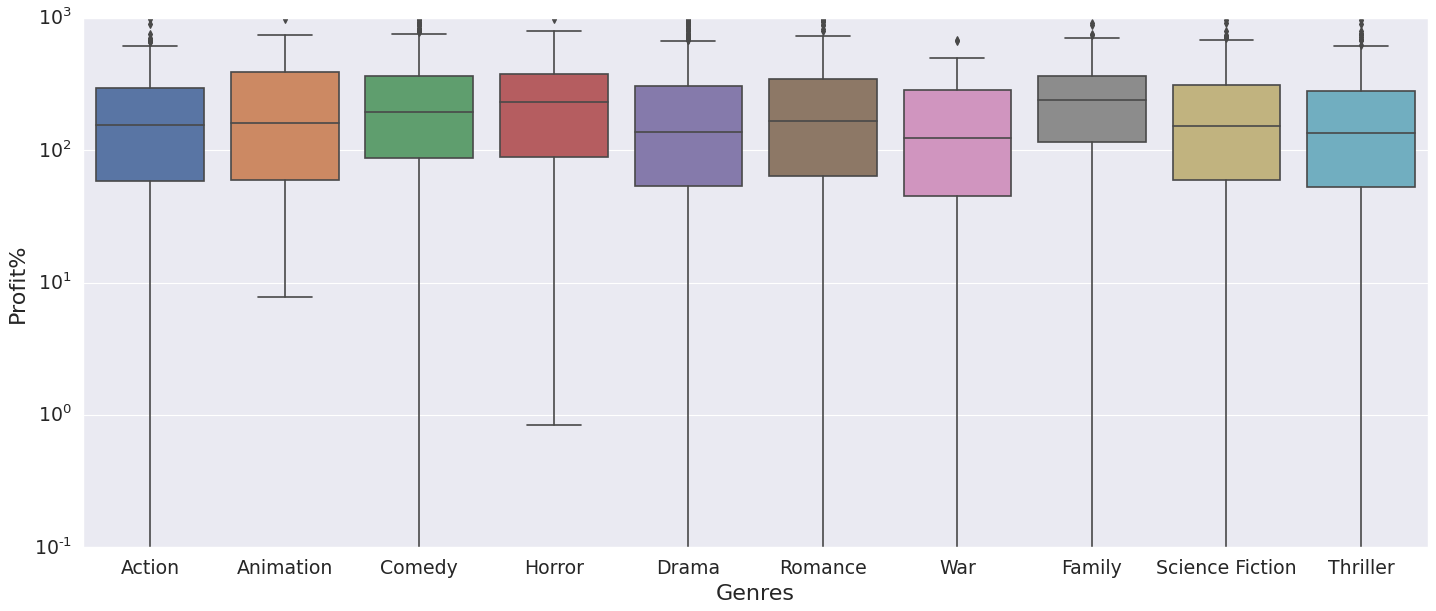

In [375]:
ax = sns.boxplot(data=list(boxDict.values()))
sns.set(rc={'figure.figsize':(21.7,8.27)})
plt.xticks(plt.xticks()[0], columns)
ax.set_xlabel("Genres",fontsize=20)
ax.set_ylabel("Profit%",fontsize=20)
ax.tick_params(labelsize=17)
ax.set_yscale("log")
ax.set_ylim(0.1, 1000);

In [376]:
from scipy import stats
for i in range(len(list(boxDict.values()))):
  print('{}:     {}% of movies with genre {} did not return any profit! \n'.format(columns[i],
round(stats.percentileofscore(list(boxDict.values())[i], 100),1), columns[i]))

Action:     37.2% of movies with genre Action did not return any profit! 

Animation:     34.1% of movies with genre Animation did not return any profit! 

Comedy:     28.3% of movies with genre Comedy did not return any profit! 

Horror:     26.3% of movies with genre Horror did not return any profit! 

Drama:     40.0% of movies with genre Drama did not return any profit! 

Romance:     34.6% of movies with genre Romance did not return any profit! 

War:     48.8% of movies with genre War did not return any profit! 

Family:     23.0% of movies with genre Family did not return any profit! 

Science Fiction:     37.1% of movies with genre Science Fiction did not return any profit! 

Thriller:     40.0% of movies with genre Thriller did not return any profit! 



### French movies: 33

too few movies in French that are made after 2000 with  budget and revenue available. 

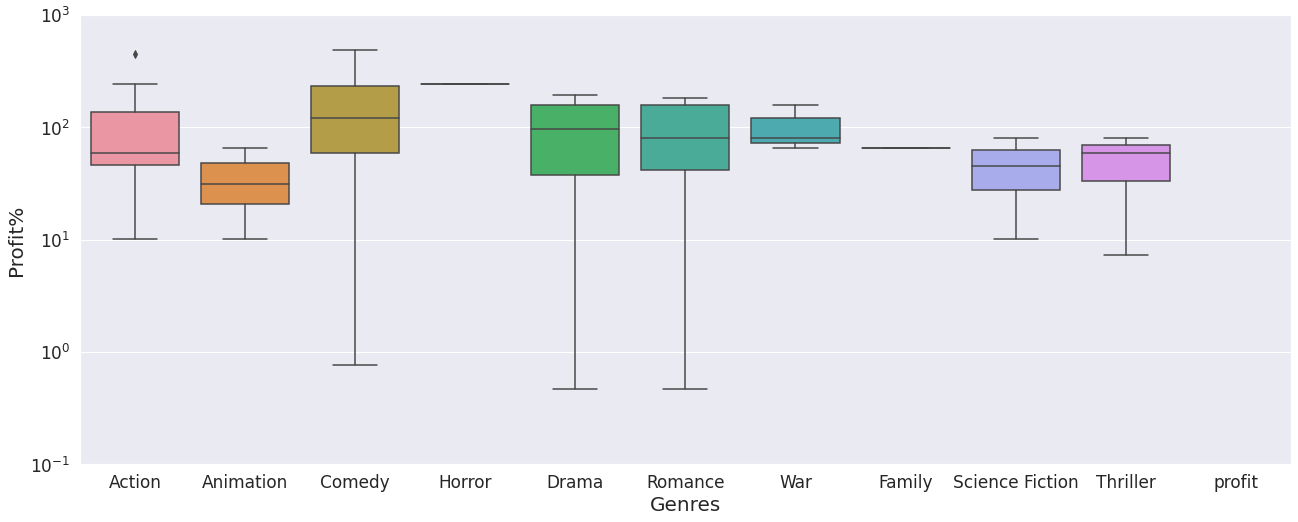

In [ ]:
ax = sns.boxplot(data=list(boxDict.values()))
sns.set(rc={'figure.figsize':(21.7,8.27)})
plt.xticks(plt.xticks()[0], columns)
ax.set_xlabel("Genres",fontsize=20)
ax.set_ylabel("Profit%",fontsize=20)
ax.tick_params(labelsize=17)
ax.set_yscale("log")
ax.set_ylim(0.1, 1000);